In [2]:
from polyglot.text import Text
from polyglot.detect import Detector
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
# read csv file with pandas library
datatext = pd.read_csv('train.csv')

In [4]:
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [5]:
# remove null values
datatext.dropna(inplace=True)
datatext

,content,score,upvotes
0,Çox qəşəy,5,0
1,Men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,Xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,Cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,Super çox sağ olun minnətdaram,5,0
127534,Azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,Bu gün çox pis xidmət etdiniz. Ona görə boltda...,1,1


In [6]:
# convert all letters of text to lowercase
datatext['content'] = datatext['content'].str.lower()
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem.....,1,0
2,salam. mən yukluyə bilmirəm. necə kömək edə bi...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz. ona görə boltda...,1,1


In [7]:
scores = datatext['score'].value_counts().sort_index()
scores

score
1     14448
2      1947
3      2763
4      4600
5    103776
Name: count, dtype: int64

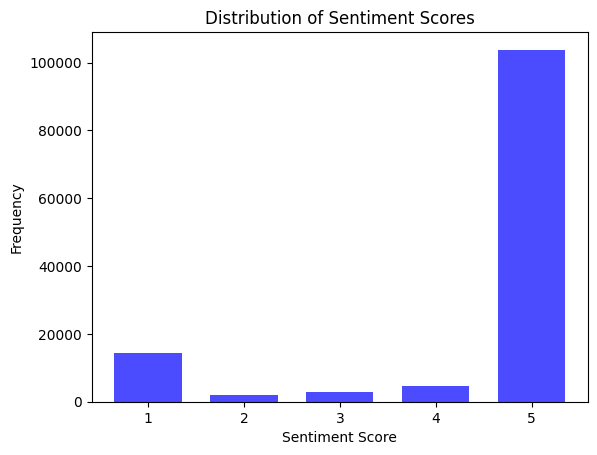

In [8]:
# Create histogram
plt.bar(scores.index, scores, color='blue', alpha=0.7, width=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [9]:
upvotes = datatext['upvotes'].value_counts().sort_index()
upvotes

upvotes
0       104964
1        10728
2         3630
3         1816
4         1116
         ...  
2127         1
2887         1
3078         1
3120         1
4314         1
Name: count, Length: 184, dtype: int64

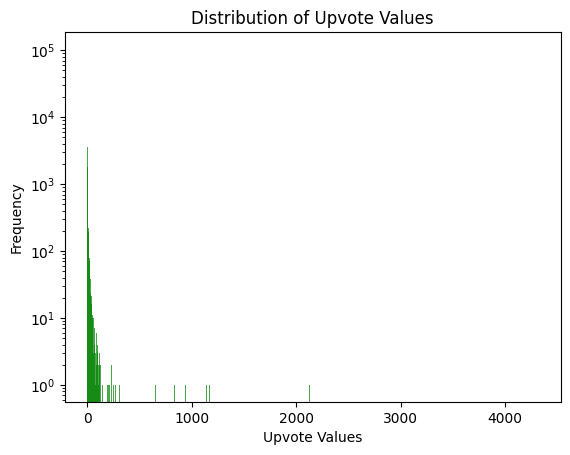

In [10]:
plt.bar(upvotes.index, upvotes, color='green', alpha=0.7, width=2)
plt.yscale('log')
plt.xlabel('Upvote Values')
plt.ylabel('Frequency')
plt.title('Distribution of Upvote Values')
plt.show()

In [11]:
# remove special characters
def preprocessor(text):
#   for word in Text(text).words:
#   if Detector(word).language.code != 'az':
#      re.sub(word, '', text)
#     print(word)
    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    
    return text

datatext['content'] = datatext['content'].apply(preprocessor)
datatext

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [12]:
#split to train and test sets
split_point = int(len(datatext) * 0.8)
train, test = datatext[ : split_point], datatext[split_point : ]

In [13]:
train

,content,score,upvotes
0,çox qəşəy,5,0
1,men niye nomre ile qeydiyatdan kece bilmirem k...,1,0
2,salam mən yukluyə bilmirəm necə kömək edə bilə...,5,0
3,cox gözəl,5,1
4,xaiş edirem bu problemi hell edinde həftədə 2 ...,5,0
...,...,...,...
102025,əla,5,0
102026,çox yaxşıdır,5,0
102027,tamamilə pulsuz elanlar olsun,5,0
102028,cihazda root olduğu üçün tədbiq işləmir telefo...,1,2


In [14]:
test

,content,score,upvotes
102030,isime yariyir,5,0
102031,çox bəyəndim başka banklardan çox seçilir,5,0
102032,könüllü,5,0
102033,super,5,0
102034,bərbaddır yeniləyirəm yenidən yenilənmə istəyir,5,0
...,...,...,...
127532,cox pisdi 24 saat 50 deyqə nedir ki güya,1,0
127533,super çox sağ olun minnətdaram,5,0
127534,azərbaycanda belə proqramların olması çox yaxş...,5,0
127535,bu gün çox pis xidmət etdiniz ona görə boltdan...,1,1


In [15]:
""" all_poly = []
all_spacy = []
all_nltk = []

# Load the spaCy EN language model
nlp = spacy.load("en_core_web_sm")


for sentence in train['content']:
    sentence = str(sentence)
    
    # Polyglot Tokenization
    polyglot_text = Text(sentence, hint_language_code='az')
    polyglot_tokens = [word for word in polyglot_text.words]
    all_poly.append(polyglot_tokens)

    # NLTK Tokenization
    nltk_tokens = nltk.word_tokenize(sentence)
    all_nltk.append(nltk_tokens)

    # spaCy Tokenization
    spacy_doc = nlp(sentence)
    spacy_tokens = [token.text for token in spacy_doc]
    all_spacy.append(spacy_tokens) """


' all_poly = []\nall_spacy = []\nall_nltk = []\n\n# Load the spaCy EN language model\nnlp = spacy.load("en_core_web_sm")\n\n\nfor sentence in train[\'content\']:\n    sentence = str(sentence)\n    \n    # Polyglot Tokenization\n    polyglot_text = Text(sentence, hint_language_code=\'az\')\n    polyglot_tokens = [word for word in polyglot_text.words]\n    all_poly.append(polyglot_tokens)\n\n    # NLTK Tokenization\n    nltk_tokens = nltk.word_tokenize(sentence)\n    all_nltk.append(nltk_tokens)\n\n    # spaCy Tokenization\n    spacy_doc = nlp(sentence)\n    spacy_tokens = [token.text for token in spacy_doc]\n    all_spacy.append(spacy_tokens) '

In [16]:
#all_poly

In [17]:
#all_spacy

In [18]:
#all_nltk

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = datatext['content'].values.tolist()

# Prepare your tokenized text data
tokenizer = Tokenizer(num_words=10000)

# texts is your list of tokenized sentences
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

# Calculate and display token statistics
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)

# Set the maximum number of tokens based on mean and standard deviation
max_tokens = int(np.mean(num_tokens) + 2 * np.std(num_tokens))

data = pad_sequences(sequences,max_tokens)

# Display padded data shapes
print("Tokens shape:", data.shape)

data_shape = data.shape[1]

2024-05-05 18:02:36.341122: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 18:02:37.361927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tokens shape: (127534, 16)


In [20]:
print(texts[7])
sequences[7]

ancag nida gəlir program çox gec açır nəmm e


[1652, 3748, 146, 192, 3, 179, 1677, 390]

In [21]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

# Define and create an embedding layer
vocab_size = 10000
embedding_dim = 100

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# Build an RNN with GRU layers on top of the embedding layer
model = Sequential()
model.add(Input(shape=(data_shape,)))
model.add(embedding_layer)
model.add(GRU(64, return_sequences=True))
model.add(Activation('relu'))
model.add(GRU(32))
model.add(Activation('tanh'))

# Change activation function here
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

2024-05-05 18:02:39.946481: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-05 18:02:39.946897: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 16, 64)         │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,313 (3.97 MB)

 Trainable params: 1,041,313 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_scores = np.array(train['score'].values.tolist())
binary_labels = np.array([1 if rating > 3 else 0 for rating in train_scores])
binary_labels

array([1, 0, 1, ..., 1, 0, 0])

In [23]:
# Training
history = model.fit(data[:split_point], binary_labels, epochs=5, batch_size=256)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8744 - loss: 0.3097
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9273 - loss: 0.2004
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9366 - loss: 0.1799
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9461 - loss: 0.1602
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9558 - loss: 0.1403


In [24]:
test_padding = data[split_point:]
test_scores = np.array(test['score'].values.tolist())
test_binary_labels = np.array([1 if rating > 3 else 0 for rating in test_scores])

print(test_padding.shape)
print(test_binary_labels.shape)

(25507, 16)
(25507,)


In [25]:

# evaluate the result
def evaluate_model(model) :
    loss, accuracy = model.evaluate(test_padding, test_binary_labels)
    print(f"Model Name: {model.name}")
    print(f"Loss: {loss}")
    print(f"Accurcy: {accuracy}")

In [26]:
evaluate_model(model)

798/798 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9055 - loss: 0.2735
Model Name: sequential
Loss: 0.27113038301467896
Accurcy: 0.9053201079368591


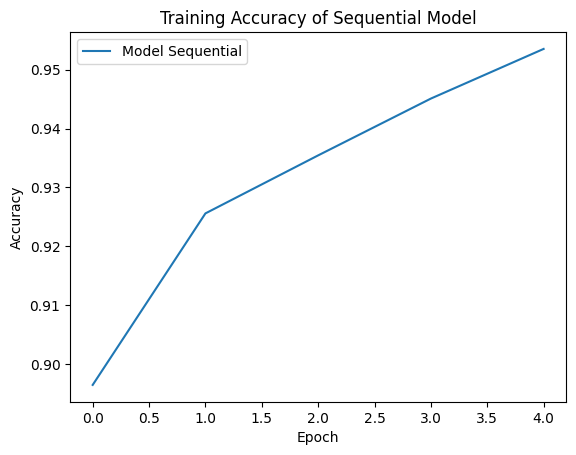

In [27]:
plt.plot(history.history['accuracy'], label=f'Model Sequential')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Sequential Model')
plt.legend()
plt.show()

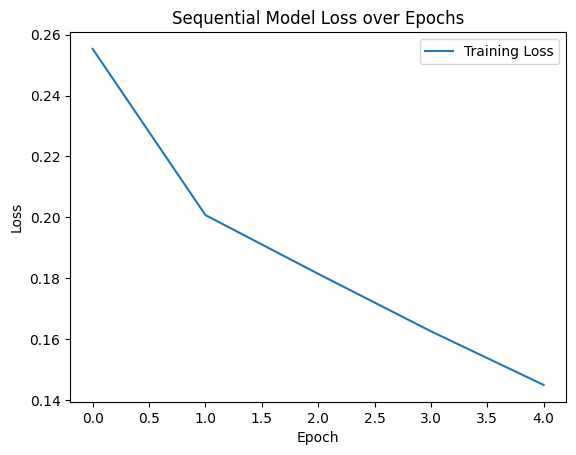

In [28]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Sequential Model Loss over Epochs')
plt.legend()
plt.show()

In [29]:
import numpy as np
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Embedding

glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

vectorizer = CountVectorizer()
vectorizer.fit(texts)
voc = vectorizer.get_feature_names_out()

num_tokens = len(voc) + 2
word_index = dict(zip(voc, range(len(voc))))
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(embedding_matrix.shape)

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])



Converted 4650 words (62012 misses)
(66664, 100)


In [30]:

# Build an RNN with GRU layers on top of the embedding layer
model2 = Sequential()
model2.add(Input(shape=(data_shape,)))
model2.add(embedding_layer)
model2.add(GRU(64, return_sequences=True))
model2.add(GRU(32))

# Change activation function here
model2.add(Dense(1, activation='sigmoid')) 

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 16, 100)        │     6,666,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 16, 64)         │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,707,713 (25.59 MB)

 Trainable params: 41,313 (161.38 KB)

 Non-trainable params: 6,666,400 (25.43 MB)

In [50]:
from gensim.models import KeyedVectors

# Load FastText embeddings
fasttext_model = KeyedVectors.load_word2vec_format('cc.az.300.vec.gz')

# Save FastText embeddings as GloVe format
#fasttext_model.save_word2vec_format('cc.az.300_glove.txt', binary=False)  #uncomment this lines to create glove file

# Save FastText embeddings as Word2Vec format
#fasttext_model.save_word2vec_format('cc.az.300_word2vec.txt', binary=True) #uncomment this lines to create word2vec file


In [32]:
# Load GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format('cc.az.300_glove.txt', binary=False)

# Load Word2Vec embeddings
word2vec_model = KeyedVectors.load_word2vec_format('cc.az.300_word2vec.txt', binary=True)


In [43]:
glove_model.vectors[:vocab_size, :embedding_dim].shape

(10000, 100)

In [49]:
# Define model architecture for pre-trained Glove
model3 = Sequential()
model3.add(Input(shape=(data_shape,)))
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[glove_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model3.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(units=32, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,092,448 (4.17 MB)

 Trainable params: 92,448 (361.12 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [48]:
# Define model architecture for pre-trained word2vec
model4 = Sequential()
model4.add(Input(shape=(data_shape,)))
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[word2vec_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model4.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(units=32, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,092,448 (4.17 MB)

 Trainable params: 92,448 (361.12 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [51]:
# Define model architecture for pre-trained FastText
model5 = Sequential()
model5.add(Input(shape=(data_shape,)))
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                    weights=[fasttext_model.vectors[:vocab_size, :embedding_dim]], trainable=False))  # Use GloVe embeddings
model5.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(units=32, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 16, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,092,448 (4.17 MB)

 Trainable params: 92,448 (361.12 KB)

 Non-trainable params: 1,000,000 (3.81 MB)